In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [62]:
!pip install jovian --upgrade --quiet

In [63]:
import torch
import jovian
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms # this library is to transform the image into a tensor so that we can work with it using pytorch
#%matplotlib inline

In [64]:
data=MNIST(root='/data',download=True)
len(data)

60000

In [65]:
img,label=data[2]

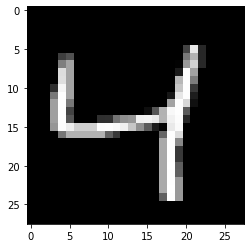

label: 4


In [66]:
plt.imshow(img,cmap='gray')
plt.show()
print('label:',label)

In [67]:
data[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F4E08F49F10>, 5)

# Training Data

In [68]:
train_data=MNIST(root='/data',
                 train=True,
                 transform=transforms.ToTensor())

In [69]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

now instead of a PIL format we have gotten a tensor and hence we can use it in logistic regression usig pythorch

label= 3


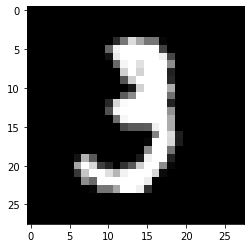

In [70]:
img,l=train_data[10]
plt.imshow(img[0,:,:],cmap='gray')
print('label=',l)

**we need to make three splits of the data we will be working with:
1 Training Data: this data is the data which will be given to the model to learn about how to make the predictions and the loss of the model will be calculated on the basis of the predictions made by the model on the training data.
2 Validation data: this data is usually taken to test the model at each epoch on the data it has not seen before. this usually helps us in finding out whether our model is generalizing well or is it overfitting on the training data.
3 Testing data: this is the data which will be given to the model to test the model's performance on the data it has not seen before**

In [71]:
from torch.utils.data import random_split,DataLoader

In [72]:
train_data,val_data=random_split(train_data,[50000,10000])

In [73]:
print(len(train_data),',',len(val_data))

50000 , 10000


**we use random split because the data might be arranged according to the labels and in this example if it is the case then the training data will have only 0 to 7 but 8 and 9 will be only on the validation data and so our model will never predict 8 or 9 and hence the validation accuracy will be 0**

**we will also be training in batches and hence we need DataLoader to make batches of training and testing data. this will help accumulate the loss of the batches and then we can update the parameters based on the loss for each batch**

In [74]:
batch_size=128
train_d=DataLoader(train_data,batch_size,shuffle=True)
val_d=DataLoader(val_data,batch_size)

In [75]:
for x,y in train_d:
    print(x[1])
    print(y[1].item())
    break

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

# Model

In [76]:
import torch.nn as nn
import torch.nn.functional as F
input_size=28*28
out=10
model=nn.Linear(input_size,out)

In [77]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0352, -0.0099, -0.0042,  ...,  0.0075, -0.0339,  0.0211],
        [-0.0183,  0.0231,  0.0071,  ...,  0.0102,  0.0008,  0.0260],
        [ 0.0182, -0.0349, -0.0071,  ...,  0.0279, -0.0201, -0.0294],
        ...,
        [-0.0074, -0.0056, -0.0207,  ...,  0.0117, -0.0141, -0.0063],
        [-0.0189,  0.0017, -0.0100,  ..., -0.0232, -0.0218, -0.0175],
        [-0.0142,  0.0127,  0.0030,  ...,  0.0077,  0.0283,  0.0236]],
       requires_grad=True)

In [78]:
for x,y in train_d:
    x=x.reshape(-1,784)
    out=model(x)
    _,pred=torch.max(out,dim=1)
    print(pred)
    print(y)
    acc=torch.sum(pred==y).item()/len(pred)
    print(acc)
    break

tensor([8, 6, 6, 8, 9, 8, 8, 6, 1, 6, 6, 4, 8, 6, 4, 1, 1, 1, 9, 6, 8, 4, 1, 8,
        6, 8, 1, 9, 4, 8, 1, 3, 8, 6, 1, 9, 6, 1, 9, 4, 8, 3, 1, 9, 5, 1, 8, 8,
        4, 6, 8, 1, 6, 8, 8, 1, 7, 8, 1, 6, 6, 8, 7, 4, 1, 8, 6, 4, 1, 7, 8, 8,
        4, 7, 6, 6, 1, 1, 6, 1, 9, 4, 1, 9, 6, 1, 1, 6, 4, 9, 1, 9, 5, 6, 9, 8,
        6, 4, 1, 8, 4, 6, 4, 4, 6, 1, 1, 8, 6, 4, 7, 6, 8, 5, 4, 6, 1, 5, 4, 9,
        6, 3, 1, 4, 6, 6, 8, 1])
tensor([6, 4, 9, 4, 0, 1, 3, 4, 2, 9, 4, 3, 2, 2, 1, 1, 8, 9, 4, 7, 1, 8, 3, 8,
        8, 1, 3, 7, 6, 6, 6, 6, 1, 6, 9, 3, 9, 5, 1, 3, 7, 6, 8, 6, 0, 9, 6, 4,
        3, 7, 9, 1, 7, 2, 1, 9, 0, 8, 3, 9, 7, 1, 0, 3, 5, 7, 5, 0, 4, 0, 1, 4,
        6, 3, 5, 8, 0, 5, 8, 1, 7, 3, 2, 7, 9, 1, 8, 7, 3, 1, 8, 3, 5, 1, 7, 2,
        9, 5, 3, 1, 5, 9, 6, 5, 7, 3, 2, 1, 6, 2, 0, 7, 1, 7, 8, 8, 1, 2, 5, 1,
        3, 6, 8, 6, 2, 4, 1, 6])
0.078125


we get a very low accuracy as these weights are random and have not learned anything about the relation between the inputs and the outputs

In [79]:
out=F.softmax(out,dim=1)
print(out)
loss=F.cross_entropy
print(loss(out,y))

tensor([[0.0709, 0.0968, 0.1053,  ..., 0.0750, 0.1366, 0.0865],
        [0.0696, 0.1235, 0.0768,  ..., 0.0917, 0.1084, 0.1082],
        [0.0829, 0.1150, 0.0902,  ..., 0.0979, 0.1128, 0.1118],
        ...,
        [0.0597, 0.1157, 0.0913,  ..., 0.0736, 0.1009, 0.1218],
        [0.0679, 0.1124, 0.0915,  ..., 0.0870, 0.1242, 0.1111],
        [0.0590, 0.1306, 0.0790,  ..., 0.1085, 0.1093, 0.1075]],
       grad_fn=<SoftmaxBackward>)
tensor(2.3001, grad_fn=<NllLossBackward>)


In [80]:
def accuracy(out,labels):
    _,a=torch.max(out,dim=1)
    acc=torch.tensor(torch.sum(a==labels).item()/len(labels))
    return acc

In [81]:
class MNISTmodel(nn.Module):
    def __init__(self):
        super().__init__()
        inp=28*28
        out=10
        self.linear=nn.Linear(inp,out)
    def forward(self,x):
        x=x.reshape(-1,784)
        out=self.linear(x)
        return out
    def training_step(self,batch):
        img,lab=batch
        out=self(img)
        loss=F.cross_entropy(out,lab)
        return loss
    def val_step(self,batch):
        img,lab=batch
        out=self(img)
        loss=F.cross_entropy(out,lab)
        acc=accuracy(out,lab)
        return({'val loss':loss,'val acc':acc})
    def val_end(self,outputs):
        batch_losses=[x['val loss'] for x in outputs]
        epoch_loss=torch.stack(batch_losses).mean()
        batch_accs=[x['val acc'] for x in outputs]
        epoch_acc=torch.stack(batch_accs).mean()
        return {'val loss':epoch_loss.item(),'val acc':epoch_acc.item()}
    def epoch_end(self,epoch,output):
        print('Epoch[{}], Validation Loss[{:.4f}],Validation Accuracy[{:.4f}]'.format(epoch,output['val loss'],output['val acc']))
model=MNISTmodel()

In [82]:
def evaluate(model,val_batch):
    res=[model.val_step(batch) for batch in val_batch]
    return model.val_end(res)
def fit(epochs,model,lr,train_data,val_data,opt=torch.optim.SGD):
    hist=[]
    optim=opt(model.parameters(),lr)
    for epoch in range(epochs):
        for batch in train_data:
            loss=model.training_step(batch)
            loss.backward()
            optim.step()
            optim.zero_grad()
        # Validation
        result=evaluate(model,val_data)
        model.epoch_end(epoch,result)
        hist.append(result)
    return hist

In [83]:
result0=evaluate(model,val_d)
result0

{'val loss': 2.3139724731445312, 'val acc': 0.0836629718542099}

In [84]:
hist_1=fit(10,model,0.01,train_d,val_d)

Epoch[0], Validation Loss[0.8997],Validation Accuracy[0.8239]
Epoch[1], Validation Loss[0.6779],Validation Accuracy[0.8475]
Epoch[2], Validation Loss[0.5875],Validation Accuracy[0.8566]
Epoch[3], Validation Loss[0.5367],Validation Accuracy[0.8665]
Epoch[4], Validation Loss[0.5030],Validation Accuracy[0.8700]
Epoch[5], Validation Loss[0.4790],Validation Accuracy[0.8736]
Epoch[6], Validation Loss[0.4603],Validation Accuracy[0.8776]
Epoch[7], Validation Loss[0.4463],Validation Accuracy[0.8796]
Epoch[8], Validation Loss[0.4340],Validation Accuracy[0.8811]
Epoch[9], Validation Loss[0.4246],Validation Accuracy[0.8826]


In [87]:
results=[result0]+hist_1
results

[{'val loss': 2.3139724731445312, 'val acc': 0.0836629718542099},
 {'val loss': 0.8996745944023132, 'val acc': 0.8238726258277893},
 {'val loss': 0.6779366731643677, 'val acc': 0.847507894039154},
 {'val loss': 0.5874869227409363, 'val acc': 0.8566060066223145},
 {'val loss': 0.5367076992988586, 'val acc': 0.8664952516555786},
 {'val loss': 0.5029721260070801, 'val acc': 0.8699564933776855},
 {'val loss': 0.4790385365486145, 'val acc': 0.8736155033111572},
 {'val loss': 0.4603329300880432, 'val acc': 0.8775712251663208},
 {'val loss': 0.44627708196640015, 'val acc': 0.879647970199585},
 {'val loss': 0.4340190589427948, 'val acc': 0.8811313509941101},
 {'val loss': 0.42459097504615784, 'val acc': 0.8826147317886353}]

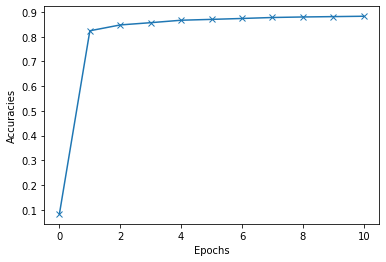

In [88]:
accs=[result['val acc'] for result in results]
plt.plot(accs,'-x')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.show()

In [ ]:
jovian.commit(project='logistic-regression-freecodecamp-5895d',environment=None)

In [ ]:
jovian.log_metrics(val_acc=results[-1]['val acc'],val_loss=results[-1]['val loss'])

In [ ]:
jovian.commit(project='logistic-regression-freecodecamp-5895d',environment=None)

# Testing

In [89]:
test_data=MNIST(root='/data',
               train=False,
               transform=transforms.ToTensor())

Predicted: 6 
Actual Label: 6


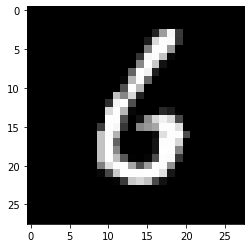

In [90]:
def predict(img):
    pred=model(img)
    _,p=torch.max(pred,dim=1)
    return(p.item())
img,lab=test_data[50]
plt.imshow(img[0,:,:],cmap='gray')
print('Predicted:',predict(img),'\nActual Label:',lab)

In [91]:
img.shape

torch.Size([1, 28, 28])

In [92]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [99]:
torch.save(model.state_dict(),'mnist-logistic.pth')

In [100]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-1.8059e-02,  1.1973e-05,  8.6009e-03,  ..., -5.9422e-03,
                       -1.7060e-03, -2.2553e-03],
                      [ 1.4099e-03,  6.0312e-03,  2.8586e-02,  ..., -5.2036e-03,
                       -3.3431e-02, -2.5746e-02],
                      [-3.2826e-02, -1.5317e-02,  9.3658e-03,  ..., -5.9571e-03,
                        5.6338e-03, -1.0107e-02],
                      ...,
                      [-2.7459e-02,  1.7607e-02,  3.2665e-02,  ...,  1.0141e-03,
                       -2.5099e-02, -7.4654e-03],
                      [-1.4530e-02,  2.8184e-02, -1.7498e-02,  ...,  3.3988e-02,
                        1.3832e-02,  2.2545e-02],
                      [ 1.5092e-02,  9.4350e-03,  3.7649e-03,  ...,  7.9337e-03,
                        2.8580e-02, -7.1255e-03]])),
             ('linear.bias',
              tensor([-0.0705,  0.1515, -0.0056, -0.0765,  0.0449,  0.2196, -0.0170,  0.1366,
                      -0.3042,

In [101]:
test_loader=DataLoader(test_data,batch_size=256)
res=evaluate(model,test_loader)
print(res)

{'val loss': 0.39148223400115967, 'val acc': 0.8955078125}


In [102]:
model2=MNISTmodel()
model2.load_state_dict(torch.load('./mnist-logistic.pth'))

<All keys matched successfully>

In [103]:
res=evaluate(model2,test_loader)

now as you can see we have loaded our model from the state dict we saved and we have got the same result. So for reusing our model later we can directly load the state dict of our trained model and use it.

In [ ]:
jovian.log_metrics(test_acc=res[-1]['val acc'],val_loss=results[-1]['val loss'])

In [107]:
jovian.commit(project='logistic-regression-freecodecamp-5895d',environment=None,files=['./mnist-logistic.pth'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/sahaajchawla/logistic-regression-freecodecamp-5895d


<IPython.core.display.Javascript object>